In [1]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd


In [2]:
# Creación de datos
x_values = np.random.uniform(low=-2, high=2, size=400)
y_values = np.random.uniform(low=-2, high=2, size=400)
circle_points_x = []
circle_points_y = []
no_circle_points_x = []
no_circle_points_y = []
for x, y in zip(x_values,y_values):
  if x**2+y**2<0.9:
    circle_points_x.append(x)
    circle_points_y.append(y)
  elif x**2+y**2>1.75 :
    no_circle_points_x.append(x)
    no_circle_points_y.append(y)

In [3]:
class_1 = [circle_points_x]+[circle_points_y]+[[1]*len(circle_points_x)]
class_0 = [no_circle_points_x]+[no_circle_points_y]+[[0]*len(no_circle_points_x)]
data_list = [class_1[0]+class_0[0],class_1[1]+class_0[1],class_1[2]+class_0[2]]
data_t = list(map(list, zip(*data_list)))
df = pd.DataFrame(data_t,columns=['x','y','label'])


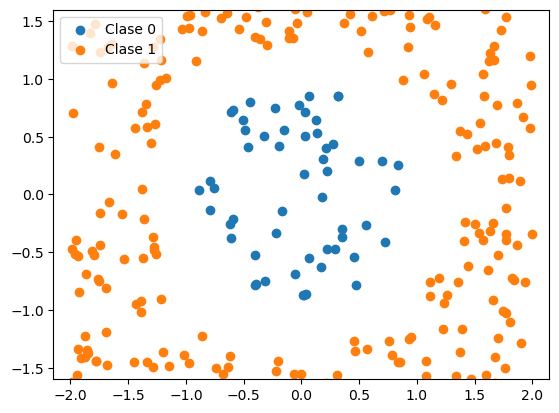

In [4]:
# Visualización de datos
plt.scatter(circle_points_x, circle_points_y, label = 'Clase 0')
plt.scatter(no_circle_points_x, no_circle_points_y, label = 'Clase 1')
plt.axis('equal')
plt.axis([-1.6,1.6,-1.6,1.6])
plt.legend(loc = "upper left")
plt.savefig('logistic_regresion_circle_data.jpg')


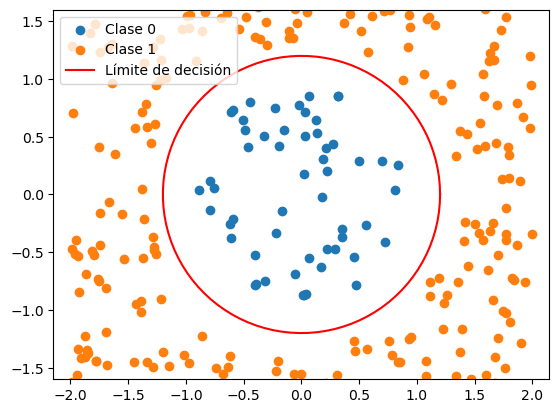

In [5]:
# Visualización del límite de decisión
theta = np.linspace(0, 2*np.pi, 100)
r= 1.2
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.scatter(circle_points_x, circle_points_y, label = 'Clase 0')
plt.scatter(no_circle_points_x, no_circle_points_y, label = 'Clase 1')
plt.plot(x,y,label = 'Límite de decisión', color = 'r')
plt.axis('equal')
plt.axis([-1.6,1.6,-1.6,1.6])
plt.legend(loc = "upper left")
plt.savefig('logistic_regresion_circle_boundary.jpg')

In [6]:
# Implementamos el modelo
def logistic_polinomial_regression(degree, x, y):
  poly = PolynomialFeatures(degree, interaction_only=False, include_bias=False)
  X_poly = poly.fit_transform(x)
  lr = LogisticRegression()
  lr.fit(X_poly,y)
  predictions = lr.predict(X_poly)
  class_1_p = x[predictions==1]
  class_0_p = x[predictions==0]
  return class_1_p, class_0_p

In [7]:
class_1_p, class_0_p = logistic_polinomial_regression(2,df[['x','y']], df['label'])

# Visualización de la predicción
plt.figure(figsize=(8, 8))
plt.scatter(class_1_p[0],class_1_p[1], color = 'b', label = 'Predice 1')
plt.scatter(class_0_p[0],class_0_p[1], color = 'r', label = 'Predice 0')
plt.legend()
plt.savefig('spiral_logistic_regression.jpg')
plt.show()

KeyError: 0

<Figure size 800x800 with 0 Axes>